## Homework 3 - Classification of data points created with make_blobs

In [48]:
#importing the libraries we need

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

%matplotlib inline

##### Making data points
We now make data points with 2000 samples and 3 features, along with a label with 3 cateogrical values

In [49]:
X, y = make_blobs(n_samples=2000, n_features=3,random_state=25)

array([[ 5.50780681,  2.10794698, -3.74153168],
       [ 2.97909796, -1.32183807,  2.17300771],
       [ 2.72278358, -1.8090979 ,  0.74557287],
       ...,
       [-7.90564619, -3.57611912, -7.07537631],
       [-7.30542542, -3.14545544, -8.4332532 ],
       [ 4.55715264,  0.26888067,  0.54723823]])

In [50]:
#inspecting data
print(f'The X is {X} and the y is {y}')

The X is [[ 5.50780681  2.10794698 -3.74153168]
 [ 2.97909796 -1.32183807  2.17300771]
 [ 2.72278358 -1.8090979   0.74557287]
 ...
 [-7.90564619 -3.57611912 -7.07537631]
 [-7.30542542 -3.14545544 -8.4332532 ]
 [ 4.55715264  0.26888067  0.54723823]] and the y is [0 2 2 ... 1 1 2]


In [51]:
X.shape

(2000, 3)

In [52]:
y.shape

(2000,)

In [53]:
#naming the columns for dataframe
columns = ["feature_1", "feature_2", "feature_3"]
columns

['feature_1', 'feature_2', 'feature_3']

In [54]:
#making the dataframe and adding data
df = pd.DataFrame(data=X, columns=columns)
df.head()

,feature_1,feature_2,feature_3
0,5.507807,2.107947,-3.741532
1,2.979098,-1.321838,2.173008
2,2.722784,-1.809098,0.745573
3,-7.196371,-1.236946,-6.292234
4,-6.296507,-1.789219,-7.429319


##### Analysiing the feature data : distribution, null, duplicates etc

In [56]:
#descriving the feature data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,2000.0,1.558886,5.871042,-9.634580,-5.690545,3.685933,6.672359,10.103277
feature_2,2000.0,-0.450707,1.840599,-4.853489,-1.850300,-0.834352,1.084577,4.689907
feature_3,2000.0,-3.622234,3.764431,-10.309421,-6.951800,-4.365332,0.439531,3.917542


In [57]:
#checking null values
df.isna().sum()

feature_1    0
feature_2    0
feature_3    0
dtype: int64

In [58]:
#finding null values
df.loc[df.duplicated()==True,:]

,feature_1,feature_2,feature_3


##### Findings:
Although the distribution is not extremely varies in scale, we can standardise the distribution since the distribution seems Gaussian, we'll explore more

### Visualizing the data for inference

In [66]:
#creating a visualization dataframe
df_viz = df.copy()
df_viz['target'] = y
df_viz

,feature_1,feature_2,feature_3,target
0,5.507807,2.107947,-3.741532,0
1,2.979098,-1.321838,2.173008,2
2,2.722784,-1.809098,0.745573,2
3,-7.196371,-1.236946,-6.292234,1
4,-6.296507,-1.789219,-7.429319,1
...,...,...,...,...
1995,6.389549,2.087469,-5.967364,0
1996,5.105662,-2.843715,0.527962,2
1997,-7.905646,-3.576119,-7.075376,1
1998,-7.305425,-3.145455,-8.433253,1


In [67]:
targets = [0,1,2]

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

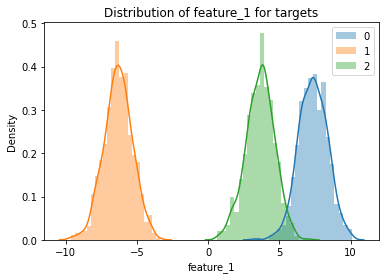

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

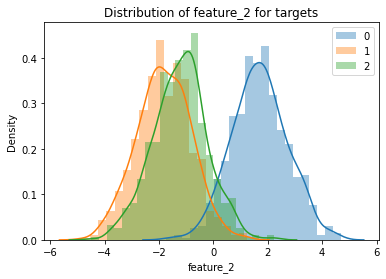

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

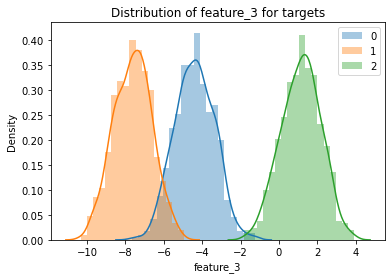

In [68]:
#visualizing how different labels have distributions for differetn features
for column in columns:
    for t in targets:
        sns.distplot(df_viz.loc[df_viz['target'] == t, column], label = t)
    plt.title('Distribution of ' + column + ' for targets')
    plt.legend()
    plt.show()
    

##### Findings: 
1. Feature 1 is the most decisive among the 3 and gives the most info on which label a data point belongs to, followed by feature3. Feature 2 is the least informative in this case.
2. The distribution, as alluded to earlier, is Gaussian


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


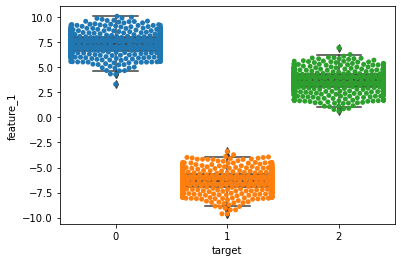

In [72]:
#A box plot to better understand how a label has values distributed along different features and the outliers in each feature 
ax_1 = sns.boxplot(x="target", y="feature_1", data=df_viz)
ax_1 = sns.swarmplot(x="target", y="feature_1", data=df_viz)


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


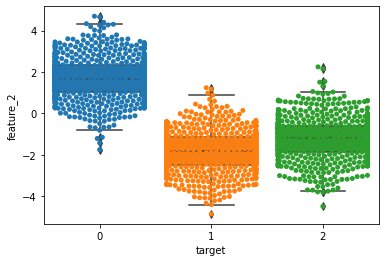

In [70]:

ax_2 = sns.boxplot(x="target", y="feature_2", data=df_viz)
ax_2 = sns.swarmplot(x="target", y="feature_2", data=df_viz)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


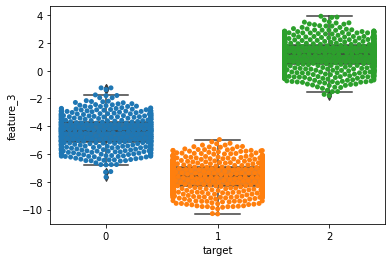

In [71]:

ax_3 = sns.boxplot(x="target", y="feature_3", data=df_viz)
ax_3 = sns.swarmplot(x="target", y="feature_3", data=df_viz)

<AxesSubplot:xlabel='target', ylabel='count'>

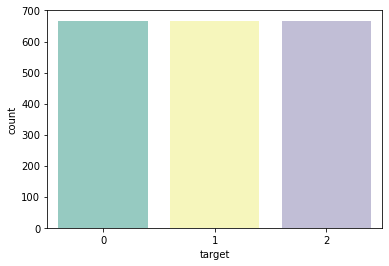

In [74]:
#checking the disctribution of labels in our data
sns.countplot(x="target", data=df_viz, palette="Set3")

##### Findings:
All the labels are evenly distributed

<AxesSubplot:>

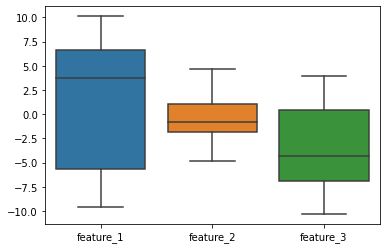

In [78]:
#Boxplot to understand where the mean and the quartiles lie
sns.boxplot(data = df)

### We will now scale the feagtures after splitting the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 75)
print(f'The size of the training set is {X_train.size} and the size of the testing set is {X_test.size}')

The size of the training set is 4200 and the size of the testing set is 1800


<AxesSubplot:>

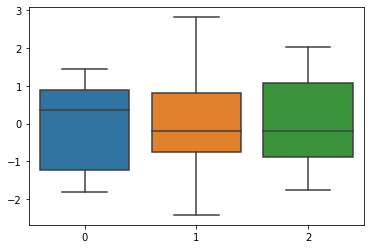

In [80]:
#We will now be scaling our data using standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#Viz the distribution for training set after standardizing
sns.boxplot(data= X_train)

<AxesSubplot:>

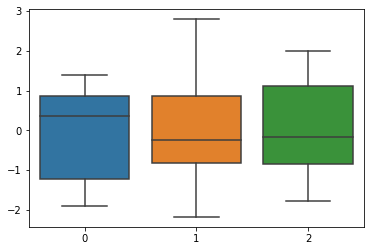

In [81]:
#Viz the distribution for testing set after standardizing
X_test  = scaler.transform(X_test)
sns.boxplot(data = X_test)

## Making the model for classification

#### We start w a simple Decision Tree with different parameters

In [31]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=32)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9983333333333333


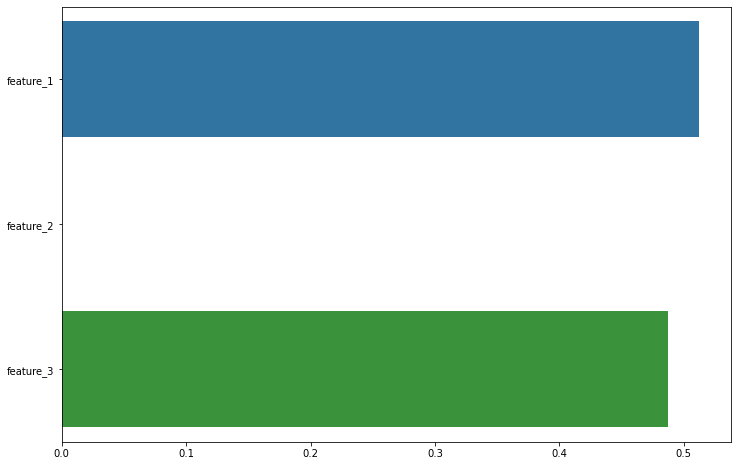

In [82]:
#Feature Importance

plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=df.columns)
plt.show()

In [83]:
#our criterion for splitting here is entropy
clf_2 = DecisionTreeClassifier(max_depth = 2, random_state=32, criterion='entropy', max_features=2)
clf_2.fit(X_train, y_train)
print("Accuracy of train for 2nd Decision Tree with entropy as criterion:",clf_2.score(X_train,y_train))
print("Accuracy of test for 2nd Decision Tree with entropy as criterion:",clf_2.score(X_test,y_test))

Accuracy of train for 2nd Decision Tree with entropy as criterion: 0.9971428571428571
Accuracy of test for 2nd Decision Tree with entropy as criterion: 0.9983333333333333


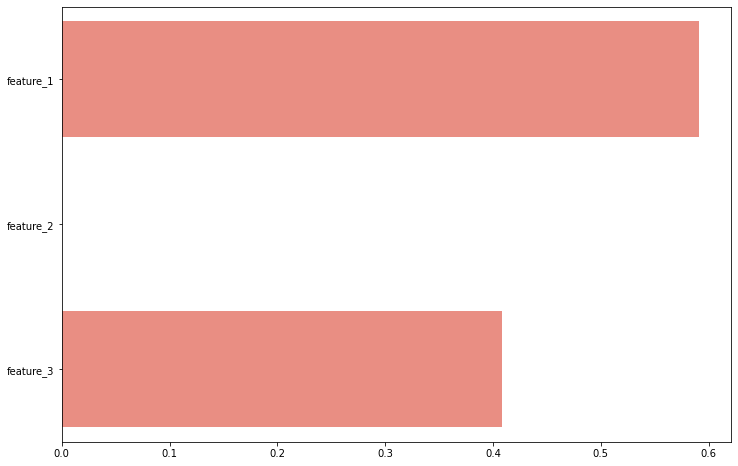

In [84]:
plt.figure(figsize=(12, 8))
importance = clf_2.feature_importances_
sns.barplot(x=importance, y=df.columns, orient='h',color='salmon')
plt.show()

##### When using entropy as our criterion, feature importance changed drastically

In [85]:
clf_3 = DecisionTreeClassifier(max_depth = 4, random_state = 32, max_features = 3, splitter = 'random')
clf_3.fit(X_train, y_train)
print("Accuracy of train for 3rd Decision Treee:",clf_3.score(X_train,y_train))
print("Accuracy of test for 3rd Decision Tree:",clf_3.score(X_test,y_test))

Accuracy of train for 3rd Decision Treee: 0.9985714285714286
Accuracy of test for 3rd Decision Tree: 0.9966666666666667


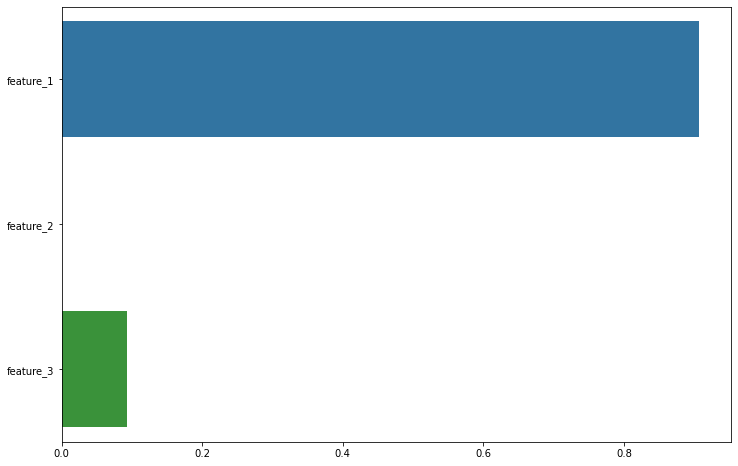

In [86]:
plt.figure(figsize=(12, 8))
importance = clf_3.feature_importances_
sns.barplot(x=importance, y=df.columns, orient='h')
plt.show()

##### When using random splitter instead of best, the importance of Feature 1 and feature 2 remained nearly the same, but feature 3 changed

#### Now trying XGBoost

In [87]:
import xgboost as xgb

In [88]:
#Making the data points
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [89]:
#Parameters for the tree
param = {'max_depth':3, 
         'eta':0.5, 
         'objective':'multi:softprob', 
        'num_class':3
         }

num_round = 5
model = xgb.train(param, dtrain, num_round)

[11:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
#predicting points with  probabilites
y_predict = model.predict(dtest)
y_predict

array([[0.02746977, 0.02723086, 0.9452993 ],
       [0.9456252 , 0.02719072, 0.02718408],
       [0.02754714, 0.9451519 , 0.02730089],
       ...,
       [0.02754714, 0.9451519 , 0.02730089],
       [0.02754714, 0.9451519 , 0.02730089],
       [0.02746977, 0.02723086, 0.9452993 ]], dtype=float32)

In [93]:
#best predict -- choose label with the highest probability
best_predict = np.asarray([np.argmax(line) for line in y_predict])
best_predict

array([2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2,

In [94]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [95]:
print("Precision = {}".format(precision_score(y_test, best_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_predict)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [96]:
#tuning parameters for xgboost
param = {'max_depth':4, 
         'eta':0.01, 
         'objective':'multi:softprob', 
        'num_class':3
         }

num_round = 5
model2 = xgb.train(param, dtrain, num_round)

[11:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
y_predict_2 = model2.predict(dtest)
best_predict_2 = np.asarray([np.argmax(line) for line in y_predict_2])

In [98]:
print("Precision = {}".format(precision_score(y_test, best_predict_2, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_predict_2, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_predict_2)))

Precision = 0.998435054773083
Recall = 0.9982905982905983
Accuracy = 0.9983333333333333


##### Findings: XGBoost is performing better than a Decision Tree Classifer, sometimes better on test than train, too. With some hyperparamteter tuning, we were able to get a precision, recall and accuracy of 1. 

In [131]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 

param_dict = {
    'max_depth':range(1,5,1),
    'min_child_weight':range(1,5,1),
    'learning_rate': [0.00001,0.01,0.5,1,5],
    'gamma':range(0,10,1),
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

KeyboardInterrupt: 

##### Findings: GridSearchCV almost broke my computer!
So, I terminated it mid-processing, as it went up for ~1 hour

### Final findings:
1. XGBoost with hyperparameter tuning performs better
2. There seems to be overfitting in Decision Tree for some hyperparameters, although it cannot be easily discerned for a small dataset
3. After evaluating different scores, XGBoost is almost comparable between Train and Test
